# Representative continuous probability distribution
- 대표적인 연속형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [9]:
# 그래프에서 사용할 선 스타일을 정의합니다. 실선, 파선, 점선입니다.
linestyles = ['-', '--', ':']

# 확률변수 X의 기대값을 계산하는 함수입니다.
def E(X, g=lambda x: x):
    x_range, f = X  # X는 확률변수의 범위와 확률밀도함수를 가집니다.
    def integrand(x):
        return g(x) * f(x)  # g(x)는 기대값을 계산할 함수, 기본적으로 항등함수입니다.
    # -np.inf to np.inf는 무한대 범위를 의미하며, 정적분을 통해 기대값을 계산합니다.
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 확률변수 X의 분산을 계산하는 함수입니다.
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)  # 먼저 기대값을 계산합니다.
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)  # 기대값에서 각 x 값을 뺀 값의 제곱에 확률밀도함수 값을 곱합니다.
    # 이 함수를 전체 범위에 대해 정적분하여 분산을 계산합니다.
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 확률변수의 확률밀도함수가 적합한지 확인하는 함수입니다.
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun  # 확률밀도함수의 최소값을 계산합니다.
    assert f_min >= 0, 'density function is minus value'  # 확률밀도함수가 음수가 아닌지 확인합니다.
    # 전체 범위에 대한 확률밀도함수의 적분을 계산하여 확률의 합이 1인지 확인합니다.
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'  # 확률의 합이 1이어야 합니다.
    # 기대값과 분산을 출력합니다.
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X):.3f}')

# 확률변수의 확률밀도함수와 누적분포함수를 시각화하는 함수입니다.
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]  # x까지의 누적분포함수 값을 계산합니다.

    # x_min에서 x_max까지의 범위를 100개의 점으로 나눕니다.
    xs = np.linspace(x_min, x_max, 100)

    # 그래프를 그리기 위한 설정을 합니다.
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    # 확률밀도함수를 파란색 실선으로 그립니다.
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='blue')
    # 누적분포함수를 빨간색 파선으로 그립니다.
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='red')

    ax.legend()  # 범례를 표시합니다.
    plt.show()  # 그래프를 화면에 표시합니다.

In [3]:
def N(mu, sigma):
    # 정규분포의 지지집합을 의미합니다. 여기서는 모든 실수 범위(-무한대부터 무한대)입니다.
    x_range = [-np.inf, np.inf]
    
    # 주어진 평균(mu)과 표준편차(sigma)를 가지는 정규분포의 확률밀도함수입니다.
    def f(x):
        # np.sqrt(2 * np.pi * sigma**2)는 정규분포의 분모에 해당하는 정규화 상수입니다.
        # np.exp(-(x-mu)**2 / (2 * sigma**2))는 e를 밑으로 하는 지수함수로,
        # x에서 평균을 뺀 값을 제곱하여 2배의 표준편차 제곱으로 나눈 것의 음수를 지수로 하는 부분입니다.
        # 이는 벨 모양의 정규분포 곡선을 형성하는 데 사용됩니다.
        return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2 * sigma**2))
    
    # x_range와 f를 튜플로 반환하여, 확률변수의 범위와 해당 확률밀도함수를 나타냅니다.
    return x_range, f

In [4]:
# 'mu'는 평균을, 'sigma'는 표준편차를 나타냄. 여기서 평균은 2이고 표준편차는 0.5임.
mu, sigma = 2, 0.5

# 'X'는 평균이 2이고 표준편차가 0.5인 정규 분포를 따르는 확률변수를 나타냄.
X = N(mu, sigma)

In [5]:
check_prob(X)

expected value 2.000
variance 0.250


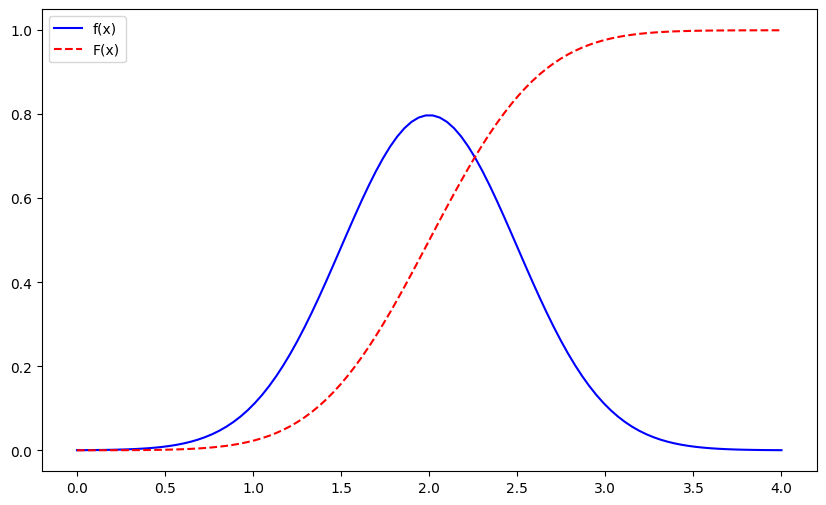

In [10]:
plot_prob(X, 0, 4)

In [11]:
# 평균이 2이고 표준편차가 0.5인 정규 분포 객체를 생성합니다.
# 이 객체는 해당 분포에서 표본을 추출하거나, 분포의 확률 밀도 함수(pdf),
# 누적 분포 함수(cdf) 등을 계산할 때 사용될 수 있습니다.
rv = stats.norm(2, 0.5)

In [12]:
# 'rv' mean 정규 분포 객체의 평균을 계산합니다.
# 이 값은 'rv' 객체를 생성할 때 'stats.norm'에 전달한 'loc' 매개변수와 동일합니다.

# 'rv' var 정규 분포 객체의 분산을 계산합니다.
# 이 값은 'rv' 객체를 생성할 때 'stats.norm'에 전달한 'scale' 매개변수의 제곱과 동일합니다.
rv.mean(), rv.var()

(2.000, 0.250)

In [13]:
# 'rv' pdf 객체가 나타내는 정규 분포에서 x=2일 때의 확률 밀도 값을 계산합니다.
# 이 경우, x 값은 평균값과 같으므로, PDF의 최대값을 반환할 것입니다.
# 정규 분포의 PDF는 벨 모양 곡선으로, 평균에서의 밀도가 가장 높습니다.
rv.pdf(2)

0.798

In [14]:
# 'rv' 객체가 나타내는 정규 분포에서 x=1.7 이하일 확률을 계산합니다.
# 이 값은 평균인 2보다 작기 때문에, 0.5보다 작은 값을 가질 것입니다.
# CDF는 확률 변수의 값이 특정 값 이하가 될 확률을 나타내는 함수입니다.
rv.cdf(1.7)

0.274

In [15]:
# 'rv' 객체가 나타내는 정규 분포에서 상위 30%에 해당하는 값을 찾습니다.
# ISF는 주어진 확률에 대해 그 확률을 초과하는 값 중 가장 작은 값을 반환합니다.
# 여기서는 상위 30% 데이터의 시작점을 나타내는 x 값을 계산합니다.
rv.isf(0.3)

2.262

In [16]:
# 'rv' 객체가 나타내는 정규 분포에서 중심을 기준으로 상위 5%와 하위 5%를 제외한
# 중앙 90%의 데이터가 포함되는 구간을 계산합니다.
# 이 구간은 신뢰 구간 추정 등에 사용될 수 있으며, 반환되는 값은 (하한값, 상한값)의 형태입니다.
rv.interval(0.9)

(1.178, 2.822)

In [17]:
# 'rv' 0.95 객체가 나타내는 정규 분포에서 상위 95% 데이터의 시작점을 나타내는 x 값을 계산합니다.
# 이 값은 분포의 왼쪽 꼬리에 해당하며, 하위 5% 값의 경계에 해당합니다.


# 'rv' 0.05 객체가 나타내는 정규 분포에서 상위 5% 데이터의 시작점을 나타내는 x 값을 계산합니다.
# 이 값은 분포의 오른쪽 꼬리에 해당하며, 상위 5% 값의 경계에 해당합니다.
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

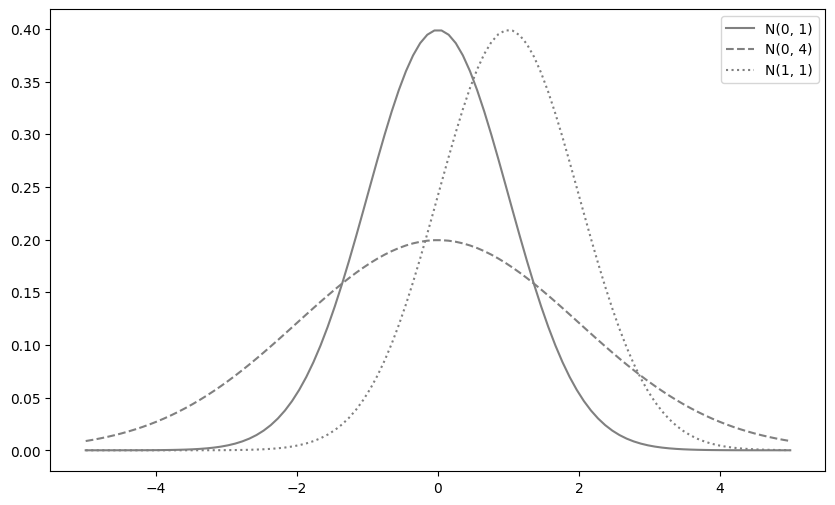

In [18]:
# 그래프의 크기를 10x6 인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드에 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# -5부터 5까지 100개의 균등한 간격의 x값을 생성합니다.
xs = np.linspace(-5, 5, 100)
# 세 가지 (평균, 표준편차) 쌍을 설정합니다.
params = [(0, 1), (0, 2), (1, 1)]
# 각 정규 분포에 대해 루프를 돌면서 PDF를 그래프에 그립니다.
for param, ls in zip(params, linestyles):
    mu, sigma = param
    # stats.norm을 사용하여 정규 분포 객체를 생성합니다.
    rv = stats.norm(mu, sigma)
    # 생성한 x값에 대한 PDF를 계산하고, 그래프에 플롯합니다.
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
# 범례를 추가합니다.
ax.legend()
# 플롯을 화면에 표시합니다.
plt.show()

In [19]:
# Ex 함수는 람다(lambda) 값을 매개변수로 받아, 지수 분포의 확률 밀도 함수와
# 그 정의역을 반환합니다.
def Ex(lam):
    # 지수 분포의 정의역은 0부터 무한대입니다.
    x_range = [0, np.inf]
    
    # f 함수는 지수 분포의 확률 밀도 함수를 정의합니다.
    # x가 0 이상일 때, λ * exp(-λ * x)의 값을 반환합니다.
    # x가 0 미만일 때는 확률이 존재하지 않으므로 0을 반환합니다.
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    # x의 정의역과 함수 f를 튜플로 묶어 반환합니다.
    return x_range, f

In [20]:
# 람다(λ) 값을 3으로 설정합니다. 이 값은 지수 분포의 매개변수로, 단위 시간당 평균 사건 발생률을 나타냅니다.
lam = 3

# Ex 함수를 호출하여 람다가 3인 지수 분포의 확률 밀도 함수와 정의역을 가져옵니다.
# X는 반환된 정의역과 확률 밀도 함수를 포함하는 튜플입니다.
X = Ex(lam)

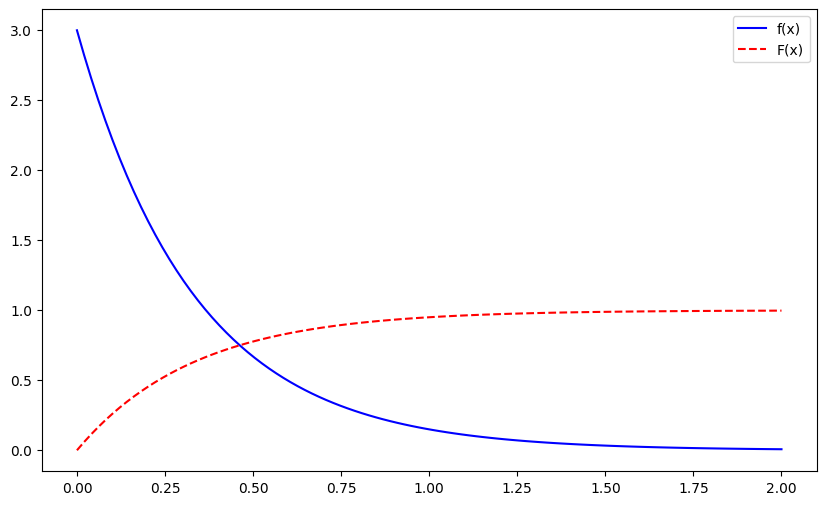

In [22]:
plot_prob(X, 0, 2)

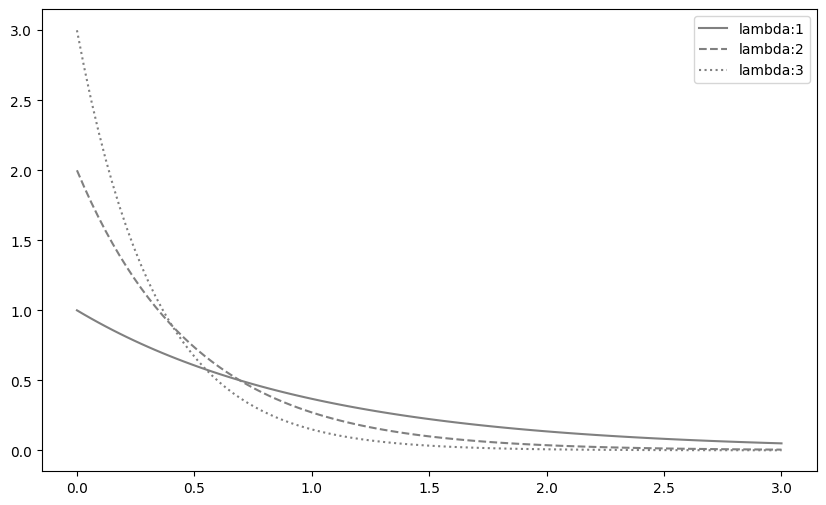

In [23]:
# 그래프의 크기를 가로 10인치, 세로 6인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 0부터 3까지 100개의 균등한 점을 생성하여 xs에 할당합니다.
xs = np.linspace(0, 3, 100)
# 여러 개의 람다 값 [1, 2, 3]과 선 스타일을 zip 함수로 묶어서 루프를 돌립니다.
for lam, ls in zip([1, 2, 3], linestyles):
    # stats.expon 함수를 사용하여 람다에 해당하는 지수 분포 객체를 생성합니다.
    # scale 매개변수는 람다의 역수로 설정됩니다.
    rv = stats.expon(scale=1/lam)
    # xs에 대한 지수 분포의 PDF 값을 계산하고, 이를 그래프에 그립니다.
    ax.plot(xs, rv.pdf(xs),
           label=f'lambda:{lam}', ls=ls, color='gray')

# 범례를 표시합니다.
ax.legend()
# 그래프를 화면에 표시합니다.
plt.show()

In [24]:
# n은 독립적인 표준 정규 분포에서 추출할 표본의 수입니다.
n = 10
# stats.norm()은 평균이 0이고 표준편차가 1인 표준 정규 분포 객체를 생성합니다.
rv = stats.norm()
# sample_size는 추출할 표본의 총 개수를 나타냅니다. 여기서는 1,000,000입니다.
sample_size = int(1e6)

# 표준 정규 분포에서 n개의 독립적인 표본을 sample_size만큼 추출합니다.
# 결과적으로 (n, sample_size) 모양의 2차원 배열이 생성됩니다.
Zs_sample = rv.rvs((n, sample_size))

# 2차원 배열에서 각 열의 합을 구하는데, 이는 n개의 표준 정규 분포 변수의 제곱합입니다.
# 이 합산된 제곱 값들은 자유도가 n인 카이 제곱 분포의 표본이 됩니다.
chi2_sample = np.sum(Zs_sample**2, axis=0)

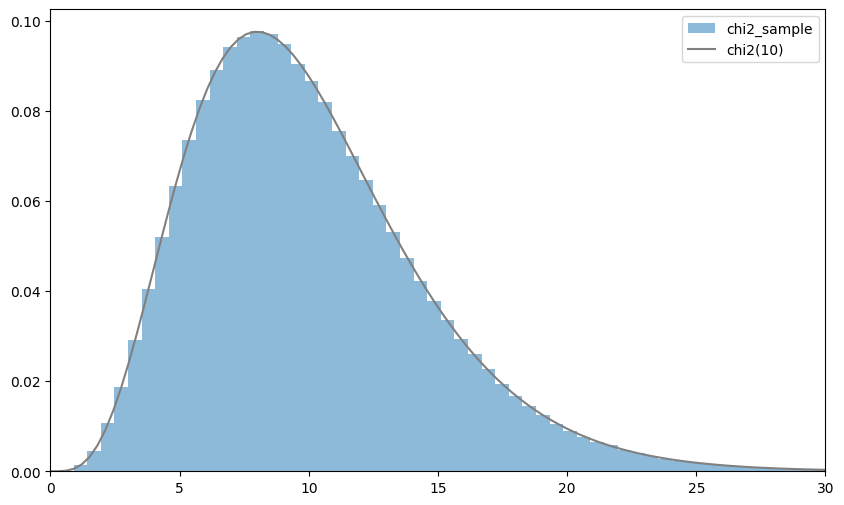

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
       alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

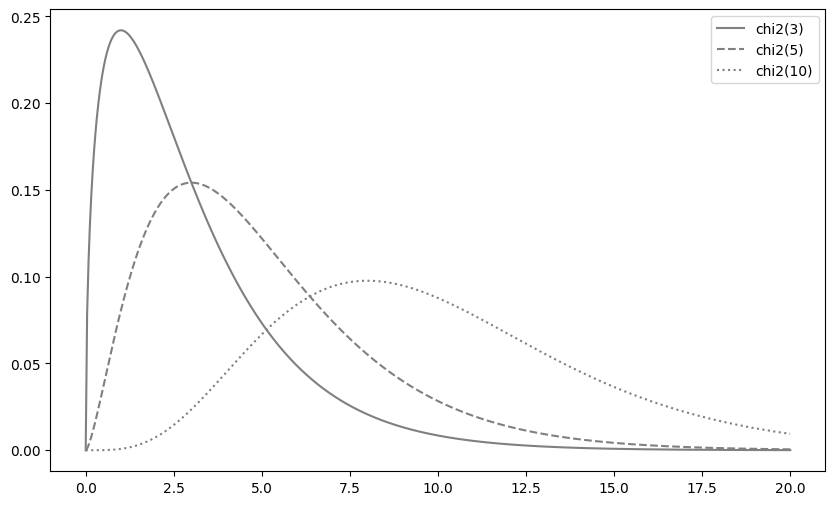

In [26]:
# 그래프의 크기를 가로 10인치, 세로 6인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 자유도가 n인 카이 제곱 분포 객체를 생성합니다.
rv_true = stats.chi2(n)
# 0부터 30까지의 x값을 생성하여 xs에 할당합니다.
xs = np.linspace(0, 30, 100)
# chi2_sample의 히스토그램을 그립니다. bins=100은 막대의 개수를 의미하며,
# density=True는 면적의 합이 1이 되도록 정규화합니다.
# alpha는 투명도를 설정하며, label은 범례에 사용됩니다.
ax.hist(chi2_sample, bins=100, density=True,
       alpha=0.5, label='chi2_sample')
# 이론적인 카이 제곱 분포의 PDF를 xs 위에 플롯합니다.
# label은 범례에 표시될 문자열을, color는 선의 색상을 지정합니다.
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

# 범례를 그래프에 추가합니다.
ax.legend()
# x축의 표시 범위를 0에서 30까지로 설정합니다.
ax.set_xlim(0, 30)
# 그래프를 화면에 표시합니다.
plt.show()

In [27]:
# stats.chi2(5)는 자유도가 5인 카이 제곱 분포 객체를 생성합니다.
rv = stats.chi2(5)

# rv.isf(0.05)는 이 카이 제곱 분포에서 상위 5% 임계값을 계산합니다.
# 유의 수준이 0.05(5%)인 카이 제곱 검정에서 사용할 수 있는 값입니다.
rv.isf(0.05)

11.070

In [30]:
# 자유도가 n인 t-분포를 위한 설정입니다.
n = 10

# 평균이 0이고 표준편차가 1인 표준 정규 분포 객체를 생성합니다.
rv1 = stats.norm()
# 자유도가 n인 카이 제곱 분포 객체를 생성합니다.
rv2 = stats.chi2(n)

# 표본의 크기를 설정합니다. 여기서는 1,000,000개의 표본을 생성합니다.
sample_size = int(1e6)
# 표준 정규 분포에서 sample_size만큼 표본을 추출합니다.
Z_sample = rv1.rvs(sample_size)
# 카이 제곱 분포에서 sample_size만큼 표본을 추출합니다.
chi2_sample = rv2.rvs(sample_size)

# t-분포의 표본을 생성합니다. 
# t-값은 표준 정규 분포에서의 표본을 자유도 n으로 나눈 카이 제곱 분포의 표본 값의 제곱근으로 나눈 값입니다.
t_sample = Z_sample / np.sqrt(chi2_sample/n)

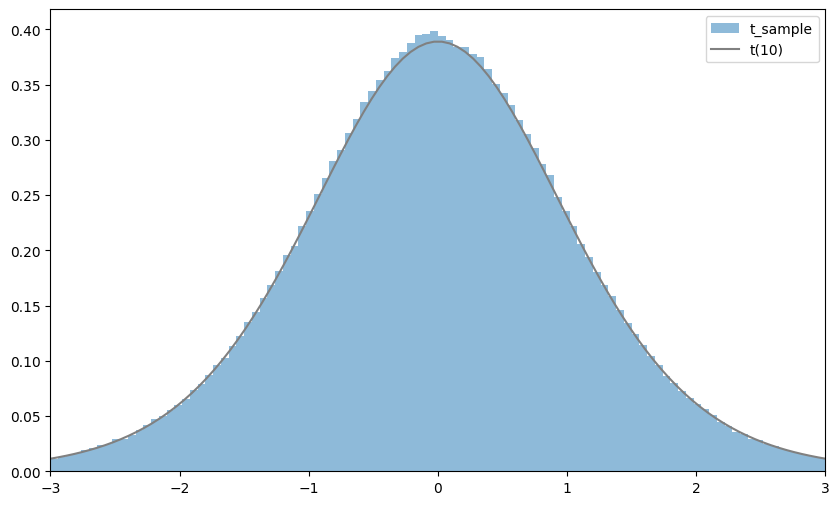

In [33]:
# 그래프의 크기를 10x6 인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 자유도가 n인 t-분포 객체를 생성합니다.
rv = stats.t(n)
# -3부터 3까지의 x값을 생성하여 xs에 할당합니다.
xs = np.linspace(-3, 3, 100)
# t_sample의 히스토그램을 그립니다. bins=100은 히스토그램의 막대 개수를 의미하며,
# range=(-3, 3)는 히스토그램을 그릴 x값의 범위를 지정합니다.
# density=True는 면적의 합이 1이 되도록 히스토그램을 정규화합니다.
# alpha는 막대의 투명도를, label은 범례에 사용될 문자열을 지정합니다.
ax.hist(t_sample, bins=100, range=(-3, 3),
       density=True, alpha=0.5, label='t_sample')
# 이론적인 t-분포의 PDF를 xs 위에 플롯합니다.
# label은 범례에 표시될 문자열을, color는 선의 색상을 지정합니다.
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

# 범례를 추가합니다.
ax.legend()
# x축의 표시 범위를 -3에서 3까지로 설정합니다.
ax.set_xlim(-3, 3)
# 그래프를 화면에 표시합니다.
plt.show()

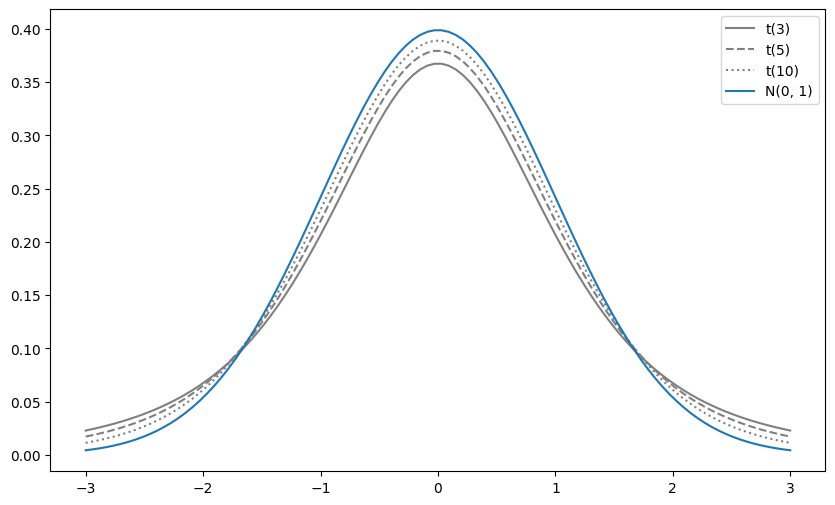

In [34]:
# 그래프의 크기를 10x6 인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# -3부터 3까지의 x값을 생성하여 xs에 할당합니다.
xs = np.linspace(-3, 3, 100)
# 서로 다른 자유도 [3, 5, 10]에 대해 루프를 돌면서 t-분포의 PDF를 그래프에 그립니다.
for n, ls in zip([3, 5, 10], linestyles):
    # 자유도가 n인 t-분포 객체를 생성합니다.
    rv = stats.t(n)
    # xs에 대한 t-분포의 PDF 값을 계산하고, 그래프에 그립니다.
    # label은 범례에 사용될 문자열을, ls는 선의 스타일을, color는 선의 색상을 지정합니다.
    ax.plot(xs, rv.pdf(xs),
           label=f't({n})', ls=ls, color='gray')

# 평균이 0이고 표준편차가 1인 표준 정규 분포 객체를 생성합니다.
rv = stats.norm()
# xs에 대한 표준 정규 분포의 PDF 값을 계산하고, 그래프에 그립니다.
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')

# 범례를 추가합니다.
ax.legend()
# 그래프를 화면에 표시합니다.
plt.show()

In [35]:
# 자유도가 5인 t-분포 객체를 생성합니다.
rv = stats.t(5)

# rv.isf(0.05)는 이 t-분포에서 상위 5% 임계값을 계산합니다.
# 유의 수준이 0.05(5%)인 t-검정에서 사용할 수 있는 값입니다.
rv.isf(0.05)

2.015

In [37]:
# 자유도 n1과 n2를 설정합니다. 이는 카이 제곱 분포의 자유도입니다.
n1 = 5
n2 = 10

# 자유도가 n1인 카이 제곱 분포 객체를 생성합니다.
rv1 = stats.chi2(n1)
# 자유도가 n2인 카이 제곱 분포 객체를 생성합니다.
rv2 = stats.chi2(n2)

# 표본의 크기를 설정합니다. 여기서는 1,000,000개의 표본을 생성합니다.
sample_size = int(1e6)
# 카이 제곱 분포 rv1에서 sample_size만큼 표본을 추출합니다.
sample1 = rv1.rvs(sample_size)
# 카이 제곱 분포 rv2에서 sample_size만큼 표본을 추출합니다.
sample2 = rv2.rvs(sample_size)

# F-분포의 표본을 생성합니다.
# F-값은 첫 번째 카이 제곱 분포의 표본을 해당 자유도로 나눈 값과,
# 두 번째 카이 제곱 분포의 표본을 해당 자유도로 나눈 값의 비율로 계산됩니다.
f_sample = (sample1/n1) / (sample2/n2)

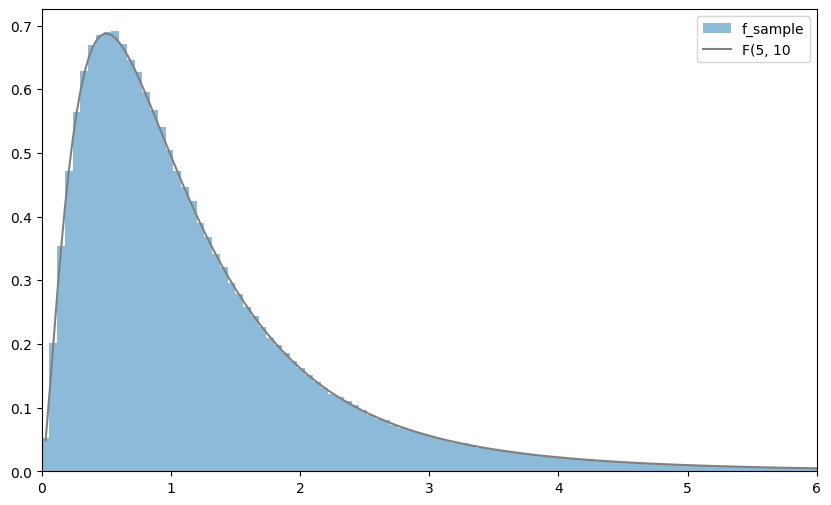

In [38]:
# 그래프의 크기를 가로 10인치, 세로 6인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 자유도가 n1, n2인 F-분포 객체를 생성합니다.
rv = stats.f(n1, n2)
# 0부터 6까지의 x값을 생성하여 xs에 할당합니다.
# 여기서 np.linspace의 시작점을 1로 설정하여 0을 제외합니다.
# F-분포는 0에서 정의되지 않기 때문입니다.
xs = np.linspace(0, 6, 200)[1:]
# f_sample의 히스토그램을 그립니다. bins=100은 히스토그램의 막대 개수를 의미하며,
# range=(0, 6)는 히스토그램을 그릴 x값의 범위를 지정합니다.
# density=True는 면적의 합이 1이 되도록 히스토그램을 정규화합니다.
# alpha는 막대의 투명도를, label은 범례에 사용될 문자열을 지정합니다.
ax.hist(f_sample, bins=100, range=(0, 6),
       density=True, alpha=0.5, label='f_sample')
# 이론적인 F-분포의 PDF를 xs 위에 플롯합니다.
# label은 범례에 표시될 문자열을, color는 선의 색상을 지정합니다.
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

# 범례를 추가합니다.
ax.legend()
# x축의 표시 범위를 0에서 6까지로 설정합니다.
ax.set_xlim(0, 6)
# 그래프를 화면에 표시합니다.
plt.show()

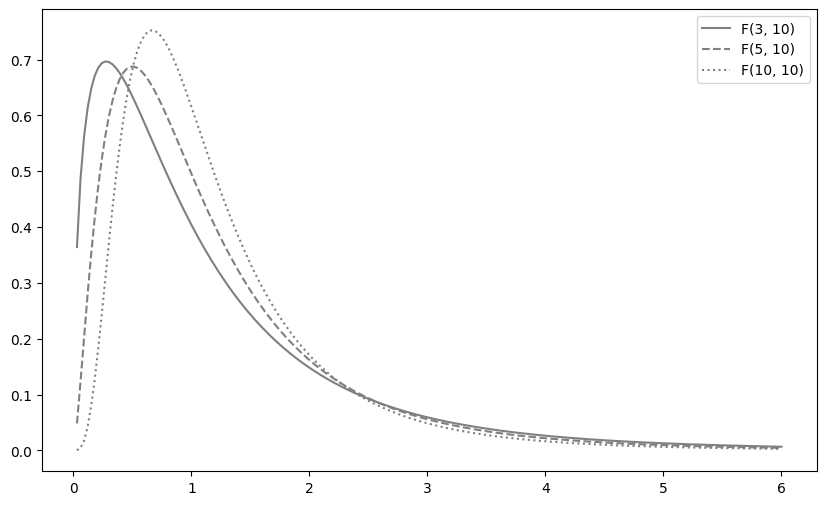

In [40]:
# 그래프의 크기를 가로 10인치, 세로 6인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 0부터 6까지의 x값을 생성하여 xs에 할당합니다.
# xs 배열의 첫 번째 요소를 제거합니다. F-분포는 0에서 정의되지 않습니다.
xs = np.linspace(0, 6, 200)[1:]
# 서로 다른 자유도 n1에 대해 F-분포의 PDF를 그립니다.
# 두 번째 자유도는 모두 10으로 고정됩니다.
for n1, ls in zip([3, 5, 10], linestyles):
    # 자유도가 n1과 10인 F-분포 객체를 생성합니다.
    rv = stats.f(n1, 10)
    # xs에 대한 F-분포의 PDF 값을 계산하고, 그래프에 그립니다.
    # label은 범례에 사용될 문자열을, ls는 선의 스타일을, color는 선의 색상을 지정합니다.
    ax.plot(xs, rv.pdf(xs),
           label=f'F({n1}, 10)', ls=ls, color='gray')

# 범례를 추가합니다.
ax.legend()
# 그래프를 화면에 표시합니다.
plt.show()